# handle dict and list columns

---
* author:  [Prasert Kanawattanachai](prasert.k@chula.ac.th)
* YouTube: https://www.youtube.com/prasertcbs
* github: https://github.com/prasertcbs/pandas/blob/main/pandas_dict_list_columns.ipynb
* [Chulalongkorn Business School](https://www.cbs.chula.ac.th/en/)
---

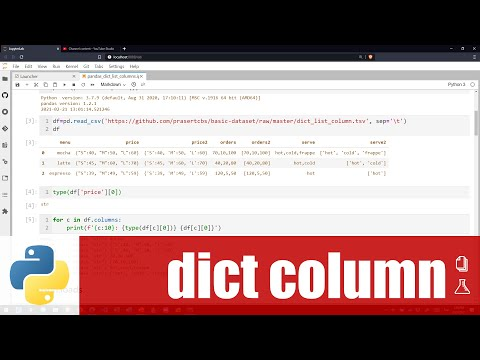

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('NfM8VXB2d0U', width=720, height=405)

In [2]:
import sys
import json
import ast # handle single/double quote in dict/json string
import pandas as pd

In [3]:
print(f'Python  version: {sys.version}')
print(f'pandas version: {pd.__version__}')
print(pd.Timestamp.now())

Python  version: 3.7.9 (default, Aug 31 2020, 17:10:11) [MSC v.1916 64 bit (AMD64)]
pandas version: 1.2.1
2021-02-21 14:00:08.214632


In [4]:
df=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/dict_list_column.tsv', sep='\t')
df

,menu,price,price2,orders,orders2,serve,serve2
0,mocha,"{""S"":40, ""M"":50, ""L"":60}","{'S':40, 'M':50, 'L':60}","70,10,100","[70,10,100]","hot,cold,frappe","['hot', 'cold', 'frappe']"
1,latte,"{""S"":45, ""M"":60, ""L"":70}","{'S':45, 'M':60, 'L':70}","40,20,80","[40,20,80]","hot,cold","['hot', 'cold']"
2,espresso,"{""S"":39, ""M"":49, ""L"":59}","{'S':39, 'M':49, 'L':59}","120,5,50","[120,5,50]",hot,['hot']


In [5]:
type(df['price'][0])

str

In [6]:
for c in df.columns:
    print(f'{c:10}: {type(df[c][0])} {df[c][0]}')

menu      : <class 'str'> mocha
price     : <class 'str'> {"S":40, "M":50, "L":60}
price2    : <class 'str'> {'S':40, 'M':50, 'L':60}
orders    : <class 'str'> 70,10,100
orders2   : <class 'str'> [70,10,100]
serve     : <class 'str'> hot,cold,frappe
serve2    : <class 'str'> ['hot', 'cold', 'frappe']


## json.loads

In [7]:
j=json.loads('{"S":40, "M":50, "L":60}')
print(type(j))
print(j)

<class 'dict'>
{'S': 40, 'M': 50, 'L': 60}


In [8]:
j['M']

50

In [9]:
df['price'].map(json.loads)

0    {'S': 40, 'M': 50, 'L': 60}
1    {'S': 45, 'M': 60, 'L': 70}
2    {'S': 39, 'M': 49, 'L': 59}
Name: price, dtype: object

In [10]:
df['price_j']=df['price'].map(json.loads)

In [11]:
df

,menu,price,price2,orders,orders2,serve,serve2,price_j
0,mocha,"{""S"":40, ""M"":50, ""L"":60}","{'S':40, 'M':50, 'L':60}","70,10,100","[70,10,100]","hot,cold,frappe","['hot', 'cold', 'frappe']","{'S': 40, 'M': 50, 'L': 60}"
1,latte,"{""S"":45, ""M"":60, ""L"":70}","{'S':45, 'M':60, 'L':70}","40,20,80","[40,20,80]","hot,cold","['hot', 'cold']","{'S': 45, 'M': 60, 'L': 70}"
2,espresso,"{""S"":39, ""M"":49, ""L"":59}","{'S':39, 'M':49, 'L':59}","120,5,50","[120,5,50]",hot,['hot'],"{'S': 39, 'M': 49, 'L': 59}"


In [12]:
df['price_k']=df['price'].apply(lambda s: json.loads(s))
df

,menu,price,price2,orders,orders2,serve,serve2,price_j,price_k
0,mocha,"{""S"":40, ""M"":50, ""L"":60}","{'S':40, 'M':50, 'L':60}","70,10,100","[70,10,100]","hot,cold,frappe","['hot', 'cold', 'frappe']","{'S': 40, 'M': 50, 'L': 60}","{'S': 40, 'M': 50, 'L': 60}"
1,latte,"{""S"":45, ""M"":60, ""L"":70}","{'S':45, 'M':60, 'L':70}","40,20,80","[40,20,80]","hot,cold","['hot', 'cold']","{'S': 45, 'M': 60, 'L': 70}","{'S': 45, 'M': 60, 'L': 70}"
2,espresso,"{""S"":39, ""M"":49, ""L"":59}","{'S':39, 'M':49, 'L':59}","120,5,50","[120,5,50]",hot,['hot'],"{'S': 39, 'M': 49, 'L': 59}","{'S': 39, 'M': 49, 'L': 59}"


In [13]:
# json.loads("{'S':40, 'M':50, 'L':60}")

## ast.literal_eval

In [14]:
x=ast.literal_eval('{"S":40, "M":50, "L":60}')
print(type(x))
print(x)

<class 'dict'>
{'S': 40, 'M': 50, 'L': 60}


In [15]:
k=ast.literal_eval("{'S':40, 'M':50, 'L':60}")
print(type(k))
print(k)

<class 'dict'>
{'S': 40, 'M': 50, 'L': 60}


In [16]:
df['price_j2']=df['price2'].map(ast.literal_eval)
df

,menu,price,price2,orders,orders2,serve,serve2,price_j,price_k,price_j2
0,mocha,"{""S"":40, ""M"":50, ""L"":60}","{'S':40, 'M':50, 'L':60}","70,10,100","[70,10,100]","hot,cold,frappe","['hot', 'cold', 'frappe']","{'S': 40, 'M': 50, 'L': 60}","{'S': 40, 'M': 50, 'L': 60}","{'S': 40, 'M': 50, 'L': 60}"
1,latte,"{""S"":45, ""M"":60, ""L"":70}","{'S':45, 'M':60, 'L':70}","40,20,80","[40,20,80]","hot,cold","['hot', 'cold']","{'S': 45, 'M': 60, 'L': 70}","{'S': 45, 'M': 60, 'L': 70}","{'S': 45, 'M': 60, 'L': 70}"
2,espresso,"{""S"":39, ""M"":49, ""L"":59}","{'S':39, 'M':49, 'L':59}","120,5,50","[120,5,50]",hot,['hot'],"{'S': 39, 'M': 49, 'L': 59}","{'S': 39, 'M': 49, 'L': 59}","{'S': 39, 'M': 49, 'L': 59}"


In [17]:
df['price_k']=df['price'].apply(lambda s: ast.literal_eval(s))
df

,menu,price,price2,orders,orders2,serve,serve2,price_j,price_k,price_j2
0,mocha,"{""S"":40, ""M"":50, ""L"":60}","{'S':40, 'M':50, 'L':60}","70,10,100","[70,10,100]","hot,cold,frappe","['hot', 'cold', 'frappe']","{'S': 40, 'M': 50, 'L': 60}","{'S': 40, 'M': 50, 'L': 60}","{'S': 40, 'M': 50, 'L': 60}"
1,latte,"{""S"":45, ""M"":60, ""L"":70}","{'S':45, 'M':60, 'L':70}","40,20,80","[40,20,80]","hot,cold","['hot', 'cold']","{'S': 45, 'M': 60, 'L': 70}","{'S': 45, 'M': 60, 'L': 70}","{'S': 45, 'M': 60, 'L': 70}"
2,espresso,"{""S"":39, ""M"":49, ""L"":59}","{'S':39, 'M':49, 'L':59}","120,5,50","[120,5,50]",hot,['hot'],"{'S': 39, 'M': 49, 'L': 59}","{'S': 39, 'M': 49, 'L': 59}","{'S': 39, 'M': 49, 'L': 59}"


### access dict

In [18]:
df['price_j']

0    {'S': 40, 'M': 50, 'L': 60}
1    {'S': 45, 'M': 60, 'L': 70}
2    {'S': 39, 'M': 49, 'L': 59}
Name: price_j, dtype: object

In [19]:
df['price_j'][1]

{'S': 45, 'M': 60, 'L': 70}

In [20]:
df.loc[1, 'price_j']

{'S': 45, 'M': 60, 'L': 70}

In [21]:
df['price_j'][1]['M']

60

In [22]:
df['price_j'].apply(lambda v: v['M'])

0    50
1    60
2    49
Name: price_j, dtype: int64

In [23]:
df['price_medium']=df['price_j'].apply(lambda v: v['M'])
df

,menu,price,price2,orders,orders2,serve,serve2,price_j,price_k,price_j2,price_medium
0,mocha,"{""S"":40, ""M"":50, ""L"":60}","{'S':40, 'M':50, 'L':60}","70,10,100","[70,10,100]","hot,cold,frappe","['hot', 'cold', 'frappe']","{'S': 40, 'M': 50, 'L': 60}","{'S': 40, 'M': 50, 'L': 60}","{'S': 40, 'M': 50, 'L': 60}",50
1,latte,"{""S"":45, ""M"":60, ""L"":70}","{'S':45, 'M':60, 'L':70}","40,20,80","[40,20,80]","hot,cold","['hot', 'cold']","{'S': 45, 'M': 60, 'L': 70}","{'S': 45, 'M': 60, 'L': 70}","{'S': 45, 'M': 60, 'L': 70}",60
2,espresso,"{""S"":39, ""M"":49, ""L"":59}","{'S':39, 'M':49, 'L':59}","120,5,50","[120,5,50]",hot,['hot'],"{'S': 39, 'M': 49, 'L': 59}","{'S': 39, 'M': 49, 'L': 59}","{'S': 39, 'M': 49, 'L': 59}",49


## list

In [24]:
df['orders'].str.split(',')

0    [70, 10, 100]
1     [40, 20, 80]
2     [120, 5, 50]
Name: orders, dtype: object

In [25]:
type(df['orders'][0])

str

In [26]:
df['x']=pd.eval(df['orders'].str.split(','))
df

,menu,price,price2,orders,orders2,serve,serve2,price_j,price_k,price_j2,price_medium,x
0,mocha,"{""S"":40, ""M"":50, ""L"":60}","{'S':40, 'M':50, 'L':60}","70,10,100","[70,10,100]","hot,cold,frappe","['hot', 'cold', 'frappe']","{'S': 40, 'M': 50, 'L': 60}","{'S': 40, 'M': 50, 'L': 60}","{'S': 40, 'M': 50, 'L': 60}",50,"[70, 10, 100]"
1,latte,"{""S"":45, ""M"":60, ""L"":70}","{'S':45, 'M':60, 'L':70}","40,20,80","[40,20,80]","hot,cold","['hot', 'cold']","{'S': 45, 'M': 60, 'L': 70}","{'S': 45, 'M': 60, 'L': 70}","{'S': 45, 'M': 60, 'L': 70}",60,"[40, 20, 80]"
2,espresso,"{""S"":39, ""M"":49, ""L"":59}","{'S':39, 'M':49, 'L':59}","120,5,50","[120,5,50]",hot,['hot'],"{'S': 39, 'M': 49, 'L': 59}","{'S': 39, 'M': 49, 'L': 59}","{'S': 39, 'M': 49, 'L': 59}",49,"[120, 5, 50]"


In [27]:
sum(df['x'][0])

180

In [28]:
df['c1']=df['orders'].str.split(',').apply(lambda v: list(map(int, v)))
df['c1']

0    [70, 10, 100]
1     [40, 20, 80]
2     [120, 5, 50]
Name: c1, dtype: object

In [29]:
df['c1'][0]

[70, 10, 100]

In [30]:
df['c2']=pd.eval(df['orders2'])
df

,menu,price,price2,orders,orders2,serve,serve2,price_j,price_k,price_j2,price_medium,x,c1,c2
0,mocha,"{""S"":40, ""M"":50, ""L"":60}","{'S':40, 'M':50, 'L':60}","70,10,100","[70,10,100]","hot,cold,frappe","['hot', 'cold', 'frappe']","{'S': 40, 'M': 50, 'L': 60}","{'S': 40, 'M': 50, 'L': 60}","{'S': 40, 'M': 50, 'L': 60}",50,"[70, 10, 100]","[70, 10, 100]","[70, 10, 100]"
1,latte,"{""S"":45, ""M"":60, ""L"":70}","{'S':45, 'M':60, 'L':70}","40,20,80","[40,20,80]","hot,cold","['hot', 'cold']","{'S': 45, 'M': 60, 'L': 70}","{'S': 45, 'M': 60, 'L': 70}","{'S': 45, 'M': 60, 'L': 70}",60,"[40, 20, 80]","[40, 20, 80]","[40, 20, 80]"
2,espresso,"{""S"":39, ""M"":49, ""L"":59}","{'S':39, 'M':49, 'L':59}","120,5,50","[120,5,50]",hot,['hot'],"{'S': 39, 'M': 49, 'L': 59}","{'S': 39, 'M': 49, 'L': 59}","{'S': 39, 'M': 49, 'L': 59}",49,"[120, 5, 50]","[120, 5, 50]","[120, 5, 50]"


In [31]:
df['c2'][0]

[70, 10, 100]

In [32]:
df['c2'].apply(lambda v: v[1])

0    10
1    20
2     5
Name: c2, dtype: int64

In [33]:
df['d1']=df['serve'].str.split(',')
df

,menu,price,price2,orders,orders2,serve,serve2,price_j,price_k,price_j2,price_medium,x,c1,c2,d1
0,mocha,"{""S"":40, ""M"":50, ""L"":60}","{'S':40, 'M':50, 'L':60}","70,10,100","[70,10,100]","hot,cold,frappe","['hot', 'cold', 'frappe']","{'S': 40, 'M': 50, 'L': 60}","{'S': 40, 'M': 50, 'L': 60}","{'S': 40, 'M': 50, 'L': 60}",50,"[70, 10, 100]","[70, 10, 100]","[70, 10, 100]","[hot, cold, frappe]"
1,latte,"{""S"":45, ""M"":60, ""L"":70}","{'S':45, 'M':60, 'L':70}","40,20,80","[40,20,80]","hot,cold","['hot', 'cold']","{'S': 45, 'M': 60, 'L': 70}","{'S': 45, 'M': 60, 'L': 70}","{'S': 45, 'M': 60, 'L': 70}",60,"[40, 20, 80]","[40, 20, 80]","[40, 20, 80]","[hot, cold]"
2,espresso,"{""S"":39, ""M"":49, ""L"":59}","{'S':39, 'M':49, 'L':59}","120,5,50","[120,5,50]",hot,['hot'],"{'S': 39, 'M': 49, 'L': 59}","{'S': 39, 'M': 49, 'L': 59}","{'S': 39, 'M': 49, 'L': 59}",49,"[120, 5, 50]","[120, 5, 50]","[120, 5, 50]",[hot]


In [34]:
df['d2']=pd.eval(df['serve2'])
df

,menu,price,price2,orders,orders2,serve,serve2,price_j,price_k,price_j2,price_medium,x,c1,c2,d1,d2
0,mocha,"{""S"":40, ""M"":50, ""L"":60}","{'S':40, 'M':50, 'L':60}","70,10,100","[70,10,100]","hot,cold,frappe","['hot', 'cold', 'frappe']","{'S': 40, 'M': 50, 'L': 60}","{'S': 40, 'M': 50, 'L': 60}","{'S': 40, 'M': 50, 'L': 60}",50,"[70, 10, 100]","[70, 10, 100]","[70, 10, 100]","[hot, cold, frappe]","[hot, cold, frappe]"
1,latte,"{""S"":45, ""M"":60, ""L"":70}","{'S':45, 'M':60, 'L':70}","40,20,80","[40,20,80]","hot,cold","['hot', 'cold']","{'S': 45, 'M': 60, 'L': 70}","{'S': 45, 'M': 60, 'L': 70}","{'S': 45, 'M': 60, 'L': 70}",60,"[40, 20, 80]","[40, 20, 80]","[40, 20, 80]","[hot, cold]","[hot, cold]"
2,espresso,"{""S"":39, ""M"":49, ""L"":59}","{'S':39, 'M':49, 'L':59}","120,5,50","[120,5,50]",hot,['hot'],"{'S': 39, 'M': 49, 'L': 59}","{'S': 39, 'M': 49, 'L': 59}","{'S': 39, 'M': 49, 'L': 59}",49,"[120, 5, 50]","[120, 5, 50]","[120, 5, 50]",[hot],[hot]


In [35]:
df['d2']=df['serve2'].map(ast.literal_eval)
df

,menu,price,price2,orders,orders2,serve,serve2,price_j,price_k,price_j2,price_medium,x,c1,c2,d1,d2
0,mocha,"{""S"":40, ""M"":50, ""L"":60}","{'S':40, 'M':50, 'L':60}","70,10,100","[70,10,100]","hot,cold,frappe","['hot', 'cold', 'frappe']","{'S': 40, 'M': 50, 'L': 60}","{'S': 40, 'M': 50, 'L': 60}","{'S': 40, 'M': 50, 'L': 60}",50,"[70, 10, 100]","[70, 10, 100]","[70, 10, 100]","[hot, cold, frappe]","[hot, cold, frappe]"
1,latte,"{""S"":45, ""M"":60, ""L"":70}","{'S':45, 'M':60, 'L':70}","40,20,80","[40,20,80]","hot,cold","['hot', 'cold']","{'S': 45, 'M': 60, 'L': 70}","{'S': 45, 'M': 60, 'L': 70}","{'S': 45, 'M': 60, 'L': 70}",60,"[40, 20, 80]","[40, 20, 80]","[40, 20, 80]","[hot, cold]","[hot, cold]"
2,espresso,"{""S"":39, ""M"":49, ""L"":59}","{'S':39, 'M':49, 'L':59}","120,5,50","[120,5,50]",hot,['hot'],"{'S': 39, 'M': 49, 'L': 59}","{'S': 39, 'M': 49, 'L': 59}","{'S': 39, 'M': 49, 'L': 59}",49,"[120, 5, 50]","[120, 5, 50]","[120, 5, 50]",[hot],[hot]


In [36]:
df['d2'][0]

['hot', 'cold', 'frappe']

In [37]:
df['d2'][0][2]

'frappe'

In [38]:
# df.to_csv('out.tsv', sep='\t', index=False)